In [1]:
# Instalar geopandas y rtree para usar overlay

!pip install geopandas

!apt install libspatialindex-dev

!pip install rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00


In [2]:
# Importar todas las librerías con las que vamos a trabajar

import geopandas

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

# Importar la clase Polígono

from shapely.geometry import Polygon

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
mex = geopandas.read_file ('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/mexican-states.shp')

In [5]:
poblacion = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/Tabulado.csv')

In [6]:
# Creamos nuestros polígonos a partir de los puntos que forman los vértices

cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])

In [7]:
print(cuadrados)

0    POLYGON ((1.00000 1.00000, 1.00000 3.00000, 4....
1    POLYGON ((2.00000 5.00000, 2.00000 7.00000, 5....
dtype: geometry


In [8]:
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

In [9]:
print(triangulos)

0    POLYGON ((2.00000 2.00000, 4.00000 5.00000, 6....
1    POLYGON ((4.00000 6.00000, 6.00000 9.00000, 6....
dtype: geometry


In [10]:
# Creamos los dos GeoDataFrames

df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_cuadrados


,geometry,df_cuadrados
0,"POLYGON ((1.00000 1.00000, 1.00000 3.00000, 4....",1
1,"POLYGON ((2.00000 5.00000, 2.00000 7.00000, 5....",2


In [11]:
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})
df_triangulos

,geometry,df_triangulos
0,"POLYGON ((2.00000 2.00000, 4.00000 5.00000, 6....",1
1,"POLYGON ((4.00000 6.00000, 6.00000 9.00000, 6....",2


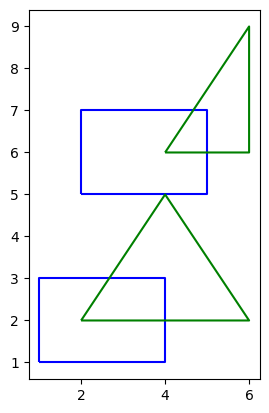

In [12]:
# Dibujamos los contornos de cuadrados en azul y de triángulos en verde

ax = df_cuadrados.boundary.plot(color='blue')

df_triangulos.boundary.plot(ax=ax, color='green')

plt.show()

<ipython-input-13-7e1058c68358>:3: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union = geopandas.overlay(df_cuadrados, df_triangulos, how='union')


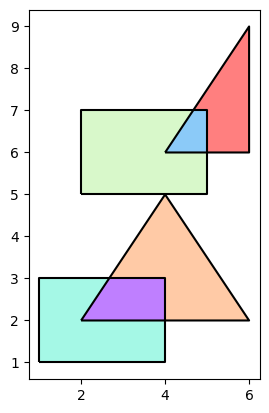

In [13]:
# Obtenemos la unión usando overlay

union = geopandas.overlay(df_cuadrados, df_triangulos, how='union')

ax = union.plot(alpha=0.5, cmap='rainbow')

# Graficamos los contornos de las geometrías originales

df_cuadrados.boundary.plot(ax=ax, color='black')

df_triangulos.boundary.plot(ax=ax, color='black')
plt.show()

In [14]:
union

,df_cuadrados,df_triangulos,geometry
0,1.0,1.0,"POLYGON ((4.00000 3.00000, 4.00000 2.00000, 2...."
1,2.0,2.0,"POLYGON ((5.00000 7.00000, 5.00000 6.00000, 4...."
2,1.0,NaN,"POLYGON ((1.00000 3.00000, 2.66667 3.00000, 2...."
3,2.0,NaN,"POLYGON ((4.66667 7.00000, 4.00000 6.00000, 5...."
4,NaN,1.0,"POLYGON ((6.00000 2.00000, 4.00000 2.00000, 4...."
5,NaN,2.0,"POLYGON ((6.00000 9.00000, 6.00000 6.00000, 5...."


<ipython-input-15-027e4b6b19ba>:3: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  interseccion = geopandas.overlay(df_cuadrados, df_triangulos, how='intersection')


<Axes: >

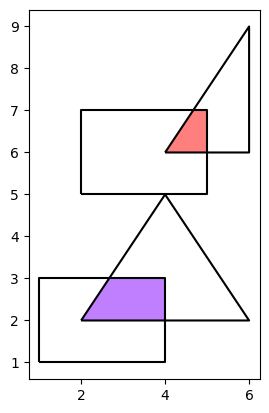

In [15]:
# Obtenemos la intersección usando overlay

interseccion = geopandas.overlay(df_cuadrados, df_triangulos, how='intersection')

ax = interseccion.plot(alpha=0.5, cmap='rainbow')

# Graficamos los contornos de las geometrías originales

df_cuadrados.boundary.plot(ax=ax, color='black')

df_triangulos.boundary.plot(ax=ax, color='black')

<Axes: >

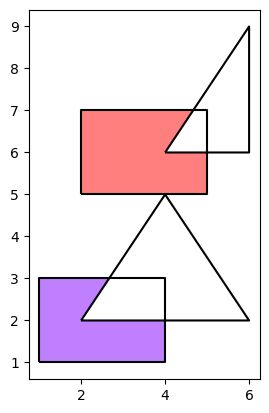

In [16]:
# Obtenemos la diferencia usando overlay

diferencia = geopandas.overlay(df_cuadrados, df_triangulos, how='difference')

ax = diferencia.plot(alpha=0.5, cmap='rainbow')

# Graficamos los contornos de las geometrías originales

df_cuadrados.boundary.plot(ax=ax, color='black')

df_triangulos.boundary.plot(ax=ax, color='black')

<Axes: >

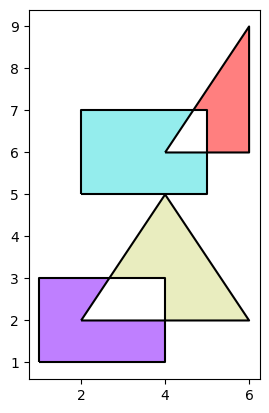

In [17]:
# Obtenemos la diferencia simétrica usando overlay

diferencia_sim = geopandas.overlay(df_cuadrados, df_triangulos, how='symmetric_difference')

ax = diferencia_sim.plot(alpha=0.5, cmap='rainbow')

# Graficamos los contornos de las geometrías originales

df_cuadrados.boundary.plot(ax=ax, color='black')

df_triangulos.boundary.plot(ax=ax, color='black')

In [18]:
mex.columns

Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

In [19]:
mex

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,NaN,NaN,NaN,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,Мехіко,state,MEX,boundary,Q82112,es:Estado de México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,Ідальго,state,HID,boundary,Q80903,es:Estado de Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,Пуебла,state,PUE,boundary,Q79923,es:Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,Нуево-Леон,state,NLE,boundary,Q15282,es:Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,Коауїла,state,COA,boundary,Q53079,es:Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


In [20]:
mex[["name","geometry"]]

,name,geometry
0,Aguascalientes,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


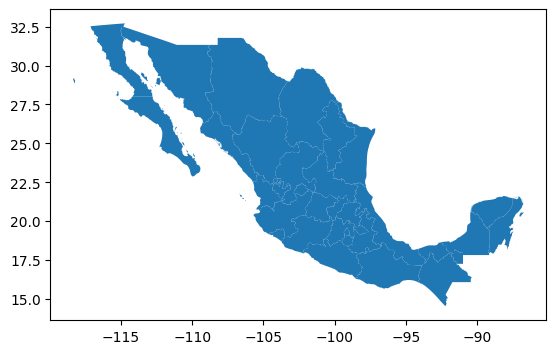

In [21]:
mex.plot()
plt.show()

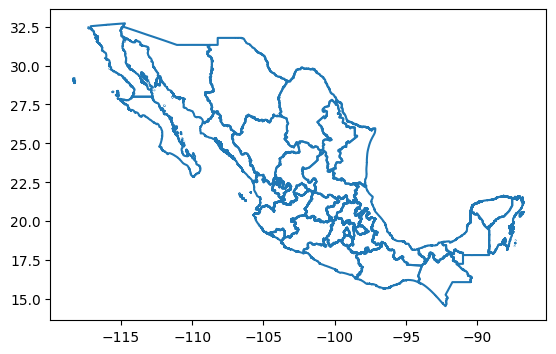

In [22]:
mex.boundary.plot()
plt.show()

In [23]:
poblacion

,Entidad federativa,2000 a,Unnamed: 2,Unnamed: 3,2005 b,Unnamed: 5,Unnamed: 6,2010 c,Unnamed: 8,Unnamed: 9
0,NaN,Total,Hombres,Mujeres,Total,Hombres,Mujeres,Total,Hombres,Mujeres
1,Estados Unidos Mexicanos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aguascalientes,944285,456533,487752,1065416,515364,550052,1184996,576638,608358
3,Baja California,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460
4,Baja California Sur,424041,216250,207791,512170,261288,250882,637026,325433,311593
5,Campeche,690689,344334,346355,754730,373457,381273,822441,407721,414720
6,Coahuila de Zaragoza,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194
7,Colima,542627,268192,274435,567996,280005,287991,650555,322790,327765
8,Chiapas,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773
9,Chihuahua,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920


In [24]:
mexgdf = mex.merge(poblacion, left_on=['name'],right_on=['Entidad federativa'])

In [25]:
mexgdf.columns

Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry',
       'Entidad federativa', '2000  a', 'Unnamed: 2', 'Unnamed: 3', '2005  b',
       'Unnamed: 5', 'Unnamed: 6', '2010  c', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [26]:
base_df = mexgdf[['name', 'Entidad federativa', 'geometry', '2010  c']].copy()
base_df

,name,Entidad federativa,geometry,2010 c
0,Aguascalientes,Aguascalientes,"POLYGON ((-102.74530 21.72005, -102.74859 21.7...",1184996
1,Colima,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884...",650555
2,Tlaxcala,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460...",1169936
3,Ciudad de México,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138...",8851080
4,Morelos,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038...",1777227
5,México,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0...",15175862
6,Hidalgo,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564...",2665018
7,Puebla,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381...",5779829
8,Nuevo León,Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490...",4653458
9,Coahuila de Zaragoza,Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2...",2748391


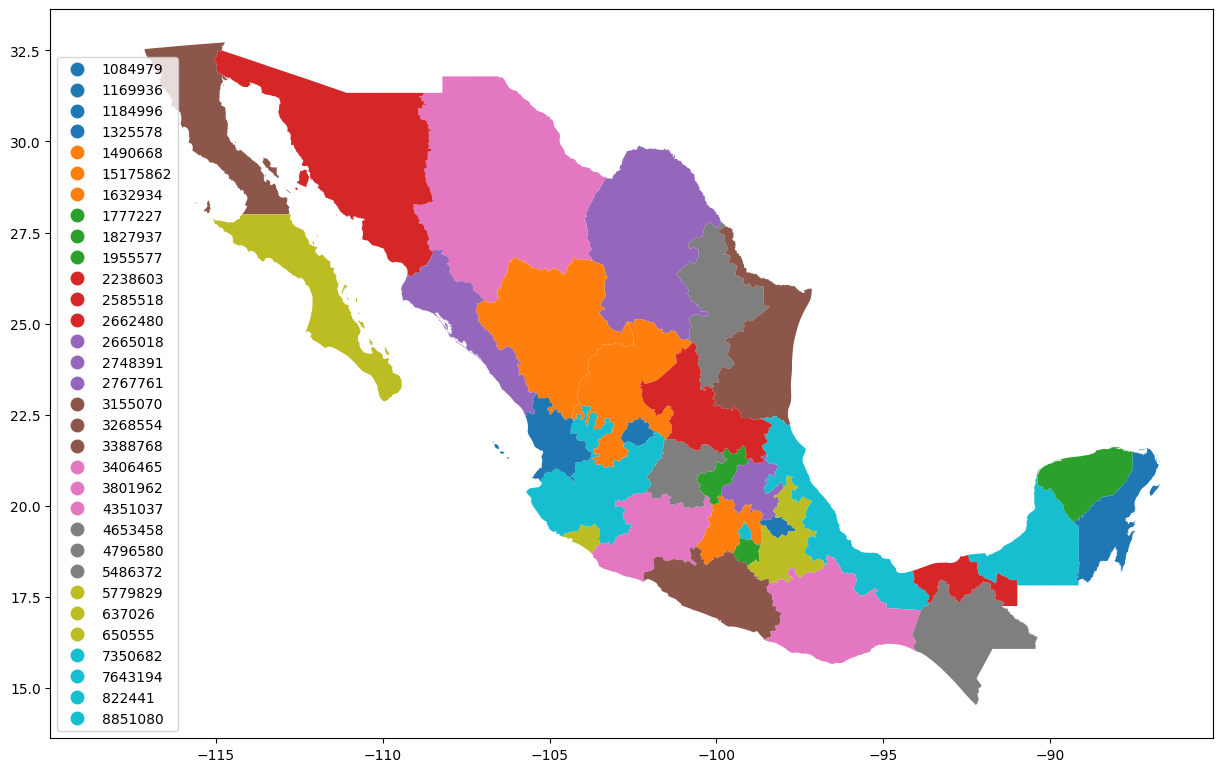

In [27]:

base_df.plot(column = '2010  c', legend=True, figsize = (15, 15), legend_kwds = {'loc': 'lower left'})
plt.show()

In [28]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/mexican-capitals.csv')


In [29]:
df.drop(columns = 'geometry')

,Estado,Capital,Lat,Long
0,Aguascalientes,Aguascalientes,21.880833,-102.296111
1,Baja California,Mexicali,32.663333,-115.467778
2,Baja California Sur,La Paz,24.142222,-110.310833
3,Campeche,San Francisco de Campeche,19.848611,-90.525278
4,Chiapas,Tuxtla Gutiérrez,16.753056,-93.115556
5,Chihuahua,Chihuahua,28.635278,-106.088889
6,Coahuila de Zaragoza,Saltillo,25.433333,-101.000000
7,Colima,Colima,19.243611,-103.730833
8,Durango,Victoria de Durango,24.022778,-104.654444
9,Guanajuato,Guanajuato,21.017778,-101.256667


In [30]:
capitales = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Long, df.Lat))
capitales.head()

,Estado,Capital,Lat,Long,geometry
0,Aguascalientes,Aguascalientes,21.880833,-102.296111,POINT (-102.29611 21.88083)
1,Baja California,Mexicali,32.663333,-115.467778,POINT (-115.46778 32.66333)
2,Baja California Sur,La Paz,24.142222,-110.310833,POINT (-110.31083 24.14222)
3,Campeche,San Francisco de Campeche,19.848611,-90.525278,POINT (-90.52528 19.84861)
4,Chiapas,Tuxtla Gutiérrez,16.753056,-93.115556,POINT (-93.11556 16.75306)


In [31]:
capitales = capitales.set_crs(mex.crs)

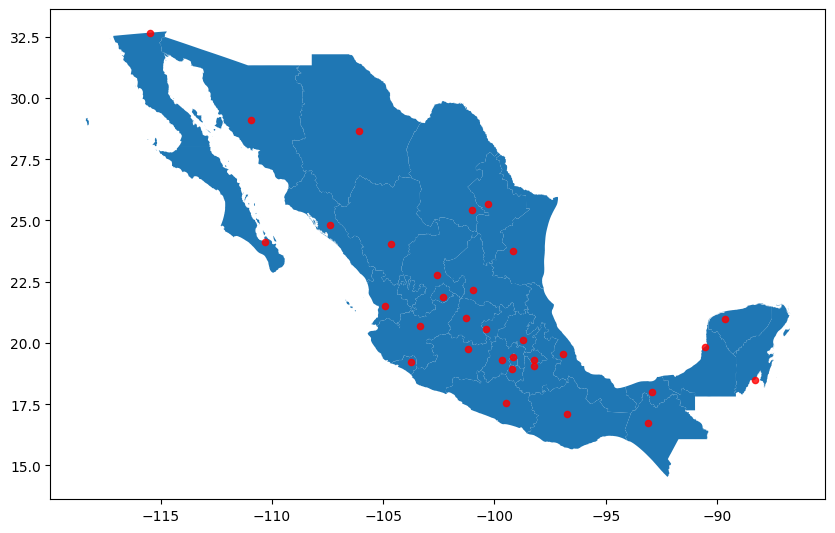

In [32]:
mapa = mex.plot(figsize = (10, 10))
capitales.plot(ax=mapa, marker='o', color='red', markersize=20, alpha = 0.8)
plt.show()

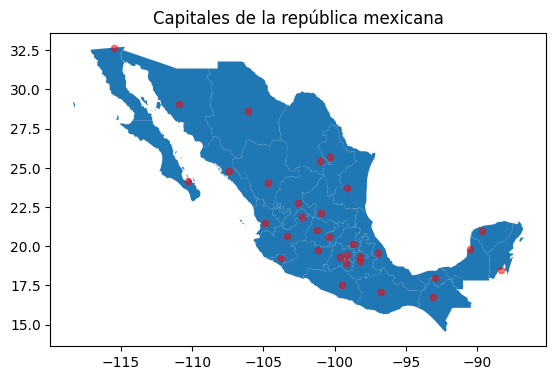

In [33]:
# Crear figura y subplot
fig, ax = plt.subplots()

# Crear un titulo
ax.set_title('Capitales de la república mexicana')

# Crear correspondencia de mapa de 1 a 1
ax.set_aspect('equal')

# Graficar mapa con los ejes que se definieron antes
mex.plot(ax = ax)

# Graficar capitales en el mismo eje anterior
capitales.plot(ax = ax, marker = 'o', color = 'red', markersize = 20, alpha = 0.5)

plt.show()

<Axes: >

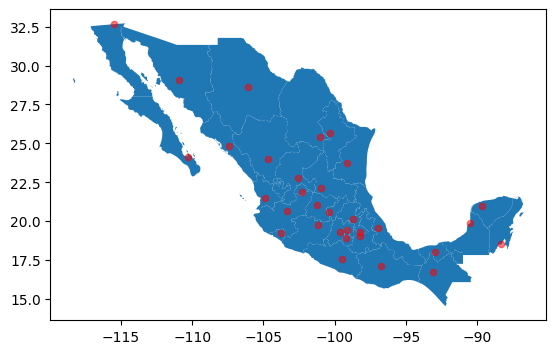

In [34]:
# Usando zorder

mapa = capitales.plot(marker = 'o', color = 'red', markersize = 20, zorder = 2, alpha = 0.5)
mex.plot( ax = mapa, zorder = 1)

In [35]:
from shapely.geometry import Point, LineString, Polygon

In [36]:
s = geopandas.GeoSeries([Point(0, 0), LineString([(1, -1), (1, 0), (2, 0), (2, 1)]), Polygon([(3, -1), (4, 0), (3, 1)])])

<Axes: >

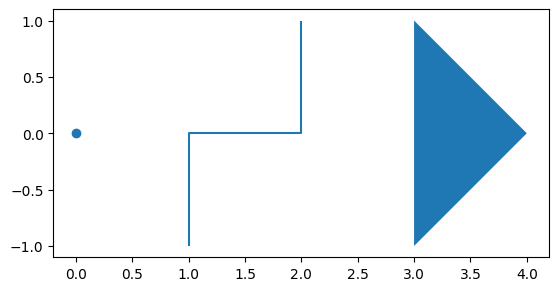

In [37]:
s.plot()

In [38]:
tcdf = geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/tiendasCostco_.csv')

In [39]:
tcdf.drop(columns = 'geometry')

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,NaN
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.1300626,55 5747 5691
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.38723675,-99.19071826,
5,6,"""Polanco""",Blvd. Miguel de Cervantes Saavedra 397,Miguel Hidalgo,19.44158937,-99.20568536,55 2122 0262
6,7,"""Interlomas""",Blvd. Magnocentro 4,Huixquilucan,19.40340847,-99.27353414,
7,8,"""Arboledas""",Av. San Nicolás 10,Tlalnepantla,19.55125298,-99.20290338,55 5321 3295
8,9,"""Satélite""",Circuito Centro Comercial 2001,Naucalpan,19.50785036,-99.23533753,
9,10,"""Atizapán""","Av. Ruiz Cortines 1 Mz, 3 Lte 3",Atizapán de Zaragoza,19.5482341,-99.2708027,55 2345 0155


In [40]:
estados = geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/mexican-states.shp')

In [41]:
costco = geopandas.GeoDataFrame(tcdf, geometry = geopandas.points_from_xy(tcdf.longitud, tcdf.latitud))

In [42]:
costco

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318,POINT (-98.23779 19.03350)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.1300626,55 5747 5691,POINT (-99.13006 19.48170)
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.38723675,-99.19071826,,POINT (-99.19072 19.38724)
5,6,"""Polanco""",Blvd. Miguel de Cervantes Saavedra 397,Miguel Hidalgo,19.44158937,-99.20568536,55 2122 0262,POINT (-99.20569 19.44159)
6,7,"""Interlomas""",Blvd. Magnocentro 4,Huixquilucan,19.40340847,-99.27353414,,POINT (-99.27353 19.40341)
7,8,"""Arboledas""",Av. San Nicolás 10,Tlalnepantla,19.55125298,-99.20290338,55 5321 3295,POINT (-99.20290 19.55125)
8,9,"""Satélite""",Circuito Centro Comercial 2001,Naucalpan,19.50785036,-99.23533753,,POINT (-99.23534 19.50785)
9,10,"""Atizapán""","Av. Ruiz Cortines 1 Mz, 3 Lte 3",Atizapán de Zaragoza,19.5482341,-99.2708027,55 2345 0155,POINT (-99.27080 19.54823)


In [43]:
costco = costco.set_crs(estados.crs)

estados = estados.to_crs(epsg=3395)

costco = costco.to_crs(epsg=3395)

In [44]:
costco.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

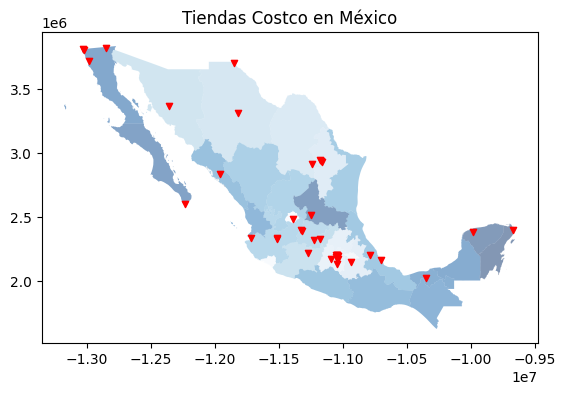

In [45]:
fig, ax = plt.subplots()

ax.set_title('Tiendas Costco en México')

ax.set_aspect('equal')

estados.plot(ax=ax, alpha=0.5, cmap='Blues')

costco.plot(ax=ax, marker='v', color='red', markersize=20)

plt.show();

In [46]:
costco['geometry']= costco.buffer(120000)

<Axes: >

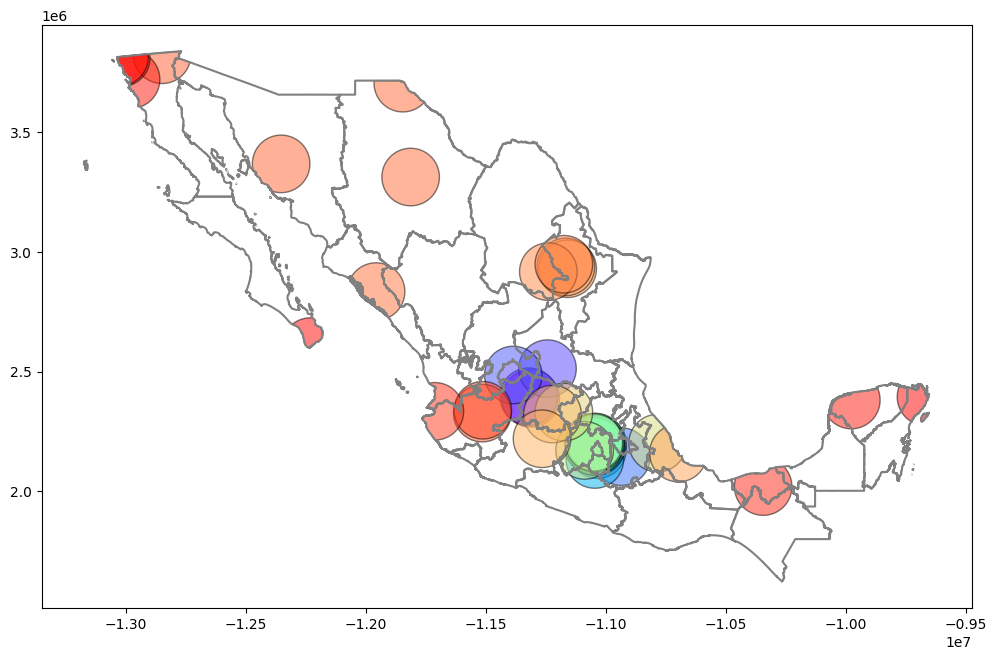

In [47]:
zonas_entrega = geopandas.overlay(estados, costco, how='intersection')

ax.set_aspect('equal')

ax = estados.boundary.plot(color='gray', figsize = (12, 12))

zonas_entrega.plot(ax=ax, alpha=0.5, edgecolor='k', cmap="rainbow")

<Axes: >

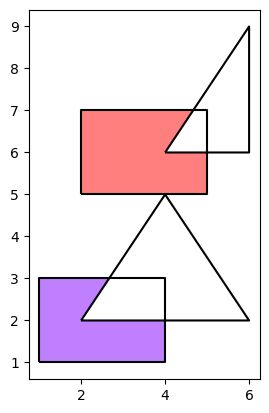

In [48]:
# Creamos nuestros polígonos a partir de los puntos que forman los vértices
cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

# Creamos los dos GeoDataFrames
df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})

# Obtenemos la diferencia usando overlay
diferencia = geopandas.overlay(df_cuadrados, df_triangulos, how='difference')
ax = diferencia.plot(alpha=0.5, cmap='rainbow')
# Graficamos los contornos de las geometrías originales
df_cuadrados.boundary.plot(ax=ax, color='black')
df_triangulos.boundary.plot(ax=ax, color='black')

<Axes: >

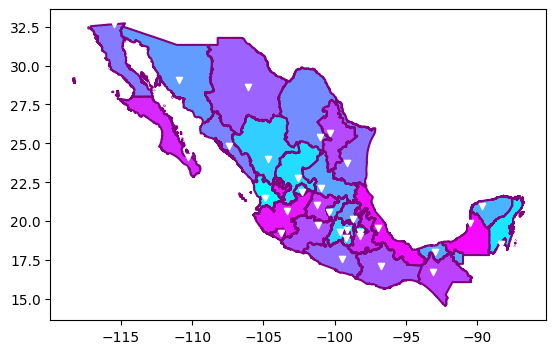

In [49]:
# Graficamos las capitales
mapa = capitales.plot(marker='v', color='white', markersize=20, zorder=2)
# Graficamos el mapa
mexgdf.plot(ax=mapa, column='2010  c', cmap='cool')
# Graficamos los bordes de los estados
mex.boundary.plot(ax=mapa, zorder=1, color='purple')

In [50]:
mexgdf

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,...,Entidad federativa,2000 a,Unnamed: 2,Unnamed: 3,2005 b,Unnamed: 5,Unnamed: 6,2010 c,Unnamed: 8,Unnamed: 9
0,MX-AGU,4,administrative,México,MX,Aguascalientes,NaN,NaN,NaN,NaN,...,Aguascalientes,944285,456533,487752,1065416,515364,550052,1184996,576638,608358
1,MX-COL,4,administrative,México,MX,Colima,NaN,NaN,NaN,NaN,...,Colima,542627,268192,274435,567996,280005,287991,650555,322790,327765
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,...,Tlaxcala,962646,469948,492698,1068207,517477,550730,1169936,565775,604161
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,NaN,NaN,...,Ciudad de México,8605239,4110485,4494754,8720916,4171683,4549233,8851080,4233783,4617297
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,...,Morelos,1555296,750799,804497,1612899,775311,837588,1777227,858588,918639
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,...,México,13096686,6407213,6689473,14007495,6832822,7174673,15175862,7396986,7778876
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,...,Hidalgo,2235591,1081993,1153598,2345514,1125188,1220326,2665018,1285222,1379796
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,...,Puebla,5076686,2448801,2627885,5383133,2578664,2804469,5779829,2769855,3009974
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,...,Nuevo León,3834141,1907939,1926202,4199292,2090673,2108619,4653458,2320185,2333273
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,...,Coahuila de Zaragoza,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194


In [51]:
# Cargamos los datos de los estados
estados = geopandas.read_file ('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/mexican-states.shp')

In [52]:
estados.columns

Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

<Axes: >

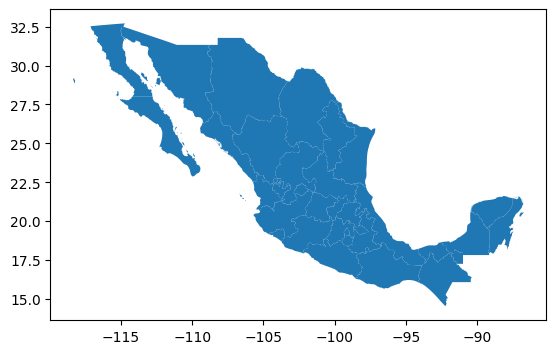

In [53]:
estados.plot()

In [54]:
# Usamos solo algunas columnas
estados = estados.loc[:, ['ISO3166-2', 'name', 'geometry']]

In [55]:
estados

,ISO3166-2,name,geometry
0,MX-AGU,Aguascalientes,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,MX-HID,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,MX-PUE,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,MX-NLE,Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,MX-COA,Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


In [56]:
# Separamos los estados por regiones
# Uniendo todos los segmentos necesarios
mx_centro = estados.loc[2:7]
mx_noreste = estados.loc[8:10].append(estados.loc[17:18])
mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
mx_centrooeste = estados.loc[12:16].append(estados.loc[0:1]).append(estados.iloc[[23]]).append(estados.iloc[[29]])
mx_sureste = estados.loc[19:20].append(estados.iloc[[22]]).append(estados.loc[24:26]).append(estados.loc[30:31])

<ipython-input-56-4fb18b937f6c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noreste = estados.loc[8:10].append(estados.loc[17:18])
<ipython-input-56-4fb18b937f6c>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
<ipython-input-56-4fb18b937f6c>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
<ipython-input-56-4fb18b937f6c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centrooeste = estados.loc[12:16].append(estados.loc[0:1]).append(estados.iloc[[23]]).

In [57]:
mx_centro

,ISO3166-2,name,geometry
2,MX-TLA,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,MX-HID,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,MX-PUE,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."


<Axes: >

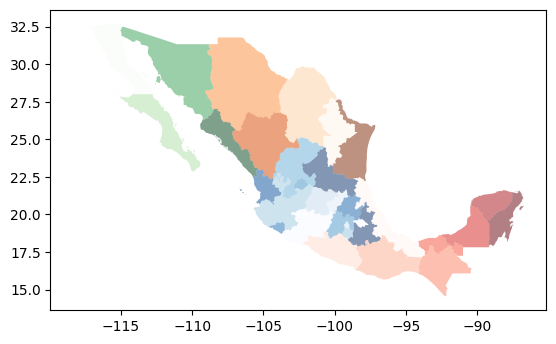

In [58]:
# Graficamos por regiones
ax = mx_centro.plot(alpha=0.5, cmap='Blues')
mx_noreste.plot(ax=ax, alpha=0.5, cmap='Oranges')
mx_noroeste.plot(ax=ax, alpha=0.5, cmap='Greens')
mx_centrooeste.plot(ax=ax, alpha=0.5, cmap='Blues')
mx_sureste.plot(ax=ax, alpha=0.5, cmap='Reds')


<Axes: >

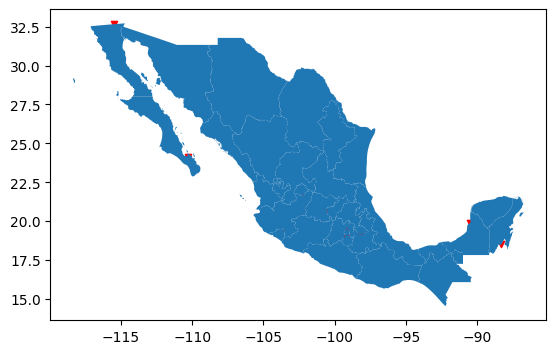

In [59]:
# Aseguramos que sea el mismo CRS
capitales = capitales.set_crs(mex.crs)
# Pintamos las capitales
mapa = capitales.plot(marker='v', color='red', markersize=20)
# Y el mapa completo
mex.plot(ax=mapa)

In [60]:
from shapely.geometry import MultiPoint

# Ejemplo de uso de MultiPoint
coords = [(19.0334989, -98.23779377), (19.28435907, -99.13865463), (20.54554608, -100.8203319)]
multi_point = MultiPoint(coords)

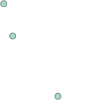

In [61]:
multi_point

In [62]:
from shapely.geometry import MultiPolygon, Polygon

# Supongamos que tenemos tres polígonos que representan áreas con buena cobertura de red inalámbrica en diferentes partes de la planta
polygon1 = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])  # Polígono 1
polygon2 = Polygon([(2, 2), (2, 3), (3, 3), (3, 2)])  # Polígono 2
polygon3 = Polygon([(4, 4), (4, 5), (5, 5), (5, 4)])  # Polígono 3

# Crear un MultiPolygon con los polígonos anteriores
multi_polygon = MultiPolygon([polygon1, polygon2, polygon3])

# Podemos agregar más polígonos si hay más áreas con buena cobertura de red inalámbrica en otras partes de la planta
# multi_polygon = MultiPolygon([polygon1, polygon2, polygon3, ...])

# Ahora "multi_polygon" contiene la información de todas las áreas con buena cobertura de red inalámbrica en la planta.


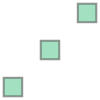

In [63]:
multi_polygon

<Axes: >

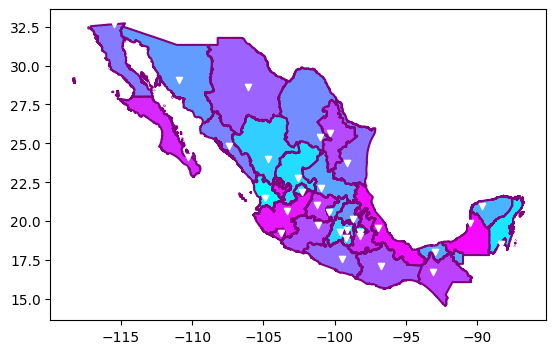

In [64]:
# Graficamos las capitales
mapa = capitales.plot(marker='v', color='white', markersize=20, zorder=2)
# Graficamos el mapa
mexgdf.plot(ax=mapa, column='2010  c', cmap='cool')
# Graficamos los bordes de los estados
mex.boundary.plot(ax=mapa, zorder=1, color='purple')

<ipython-input-65-026bb982a18c>:10: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  interseccion = geopandas.overlay(df_cuadrados, df_triangulos, how='intersection')


<Axes: >

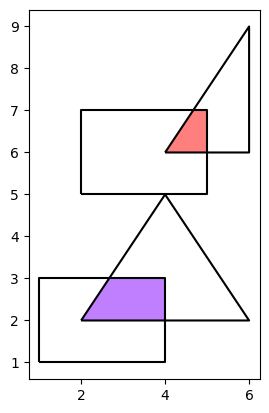

In [65]:
# Creamos nuestros polígonos a partir de los puntos que forman los vértices
cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

# Creamos los dos GeoDataFrames
df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})

# Obtenemos la intersección usando overlay
interseccion = geopandas.overlay(df_cuadrados, df_triangulos, how='intersection')
ax = interseccion.plot(alpha=0.5, cmap='rainbow')
# Graficamos los contornos de las geometrías originales
df_cuadrados.boundary.plot(ax=ax, color='black')
df_triangulos.boundary.plot(ax=ax, color='black')

<ipython-input-66-b307edb40d25>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noreste = estados.loc[8:10].append(estados.loc[17:18])
<ipython-input-66-b307edb40d25>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
<ipython-input-66-b307edb40d25>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
<ipython-input-66-b307edb40d25>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centrooeste = estados.loc[12:16].append(estados.loc[0:1]).append(estados.iloc[[23]]).

<Axes: >

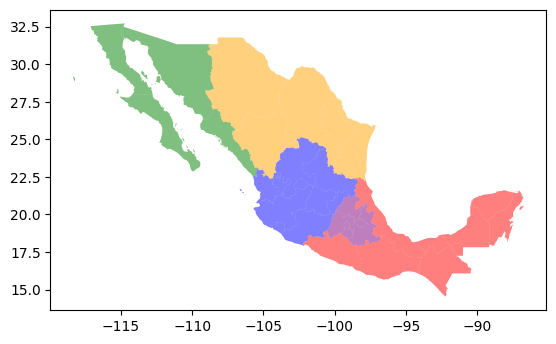

In [66]:
# Separamos los estados por regiones
# Uniendo todos los segmentos necesarios
mx_centro = estados.loc[2:7]
mx_noreste = estados.loc[8:10].append(estados.loc[17:18])
mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
mx_centrooeste = estados.loc[12:16].append(estados.loc[0:1]).append(estados.iloc[[23]]).append(estados.iloc[[29]])
mx_sureste = estados.loc[19:20].append(estados.iloc[[22]]).append(estados.loc[24:26]).append(estados.loc[30:31])


# Graficamos por regiones
ax = mx_centro.plot(alpha=0.5, color='purple')
mx_noreste.plot(ax=ax, alpha=0.5, color='orange')
mx_noroeste.plot(ax=ax, alpha=0.5, color='green')
mx_centrooeste.plot(ax=ax, alpha=0.5, color='blue')
mx_sureste.plot(ax=ax, alpha=0.5, color='red')

<Axes: >

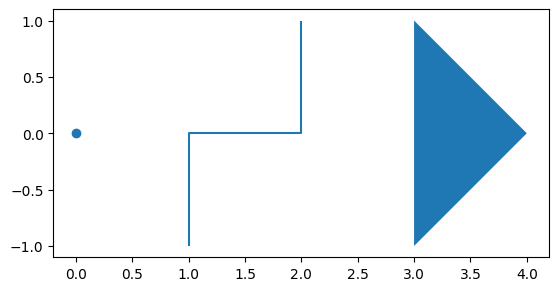

In [67]:
s.plot()

<Axes: >

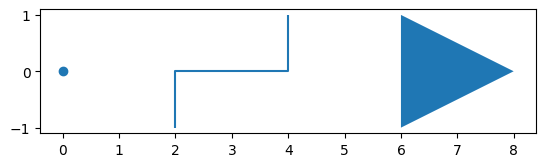

In [68]:
s.scale(2.0,1.0, origin=(0,0)).plot()

<Axes: >

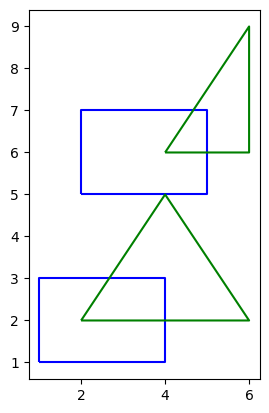

In [69]:
# Creamos nuestros polígonos a partir de los puntos que forman los vértices
cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

# Creamos los dos GeoDataFrames
df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})

# Graficamos
ax = df_cuadrados.boundary.plot(color='blue')
df_triangulos.boundary.plot(ax=ax, color='green')

In [70]:
s = geopandas.GeoSeries([Point(0, 0), LineString([(1, -1), (1, 0), (2, 0), (2, 1)]), Polygon([(3, -1), (4, 0), (3, 1)])])

<Axes: >

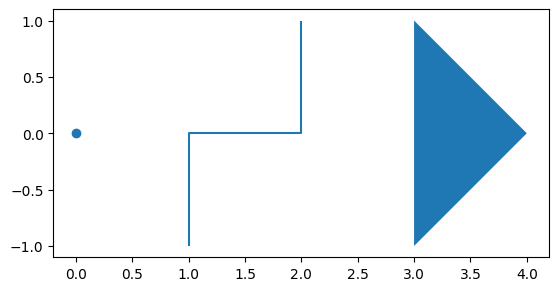

In [71]:
s.plot()

In [72]:
from shapely.geometry import Point, LineString, Polygon
s = geopandas.GeoSeries(
   [
   Point(1, 1),
      LineString([(2, -1),(1, -1), (1, 0)]),
   Polygon([(-1, -1), (0.5, 0), (-1, 1)]),
   ]
)

<Axes: >

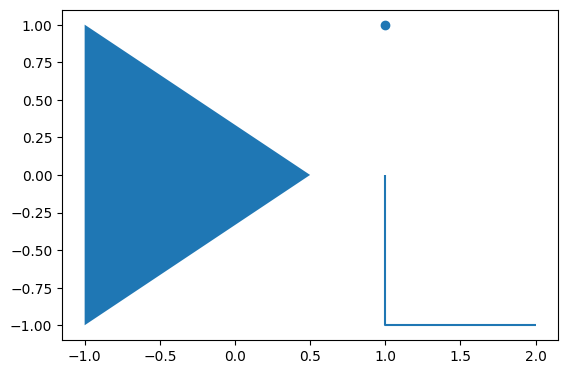

In [73]:
s.plot()

<Axes: >

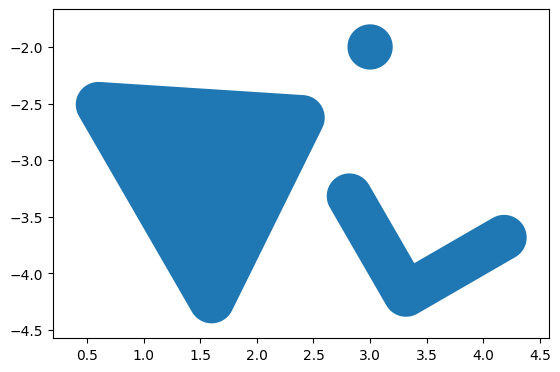

In [74]:
s2 = s.rotate(30)

s2 = s2.translate(2,-3)

s2 = s2.buffer(0.2)

s2.plot()

<Axes: >

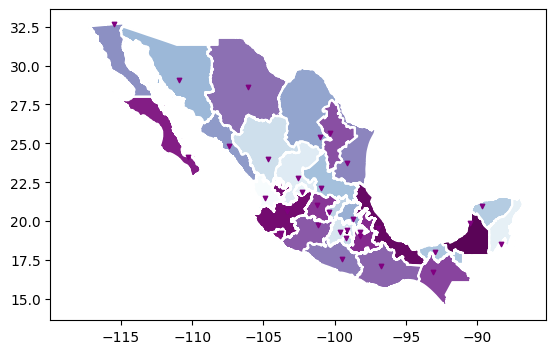

In [75]:
# Graficamos las capitales
mapa = capitales.plot(marker='v', color='purple', markersize=10, zorder=2)
# Graficamos el mapa
mexgdf.plot(ax=mapa, column='2010  c', cmap='BuPu')
# Graficamos los bordes de los estados
mex.boundary.plot(ax=mapa, zorder=1, color='white')

<Axes: >

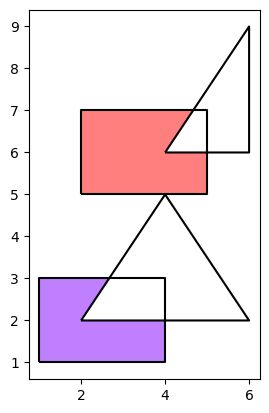

In [76]:
# Creamos nuestros polígonos a partir de los puntos que forman los vértices
cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

# Creamos los dos GeoDataFrames
df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})

# Obtenemos la diferencia usando overlay
diferencia = geopandas.overlay(df_cuadrados, df_triangulos, how='difference')
ax = diferencia.plot(alpha=0.5, cmap='rainbow')
# Graficamos los contornos de las geometrías originales
df_cuadrados.boundary.plot(ax=ax, color='black')
df_triangulos.boundary.plot(ax=ax, color='black')